# 9. Закрепление знаний. Визуализация данных

In [46]:
import pandas as pd

In [47]:
import plotly
import plotly.express as px
print(plotly.__version__)

6.0.0


In [48]:
churn_data = pd.read_csv('/Users/dasha/Desktop/Skillfactory/IDE/my_data_science/PY_13_Визуализация данных/data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
## Делаем копию исходных данных
churn_data_df  = churn_data.copy()
## Избавимся от лишнего столбца
churn_data_df = churn_data_df.drop('RowNumber', axis=1)
## Проверяем
churn_data_df.head()



,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [50]:
## Обозначаем лояльных и не лояльных клиентов
churn_data_df['Loyalty'] = churn_data_df['Exited'].apply(lambda x: 'Exited' if x == 1 else 'Loyal')
### Проверяем
churn_data_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Exited
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Loyal
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Exited
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Loyal
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Loyal


In [51]:
## Строим график, показывающий доли лояльных и не лояльных клиентов
churn_data_df['ratio'] = churn_data_df['Exited'].value_counts()
fig = px.pie(churn_data_df, values='ratio', names='Loyalty', title='Соотношение лояльных и ушедших клиентов')
fig.show()

### Выводы: В банке значительный отток клиентов - в особенности по отношению к лояльным (соотношение 79.6% к 20.4% соответственно)

## 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [52]:
# фильтруем клиентов
mask = churn_data_df['Balance']>2500
# строим гистограмму распределения балансов клиентов
fig = px.histogram(data_frame=churn_data_df[mask], x='Balance', title='Гистограмма распределения балансов клиентов')
fig.show()

### Выводы: подавляющая доля клиентов банка, у которых на счету больше 2500 долларов, держит на балансе от 50 000 до 200 000 долларов. У основной группы из этих клиентов баланс счета лежит в диапазоне от 100 000 до 150 000 долларов, Клиенты с балансом от 0 до 50 000 долларов и от 200 000 до 250 000 долларов, встречаются, но их количество в общей массе клиентов, у которых на счету более 2500 долларов, не велико. 

## 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [53]:
# строим гистограмму распределения баланса в разрезе "лояльный клиент - ушедший клиент"
fig = px.histogram(data_frame=churn_data_df, x='Balance', color='Loyalty', title='Гистограмма распределения баланса в зависимости от лояльности клиента', nbins = 30)
fig.show()

### Выводы: Значительное количество лояльных клиентов имеют на счету нулевой баланс. вопрос - почему? ипри этом ушедшие клиенты имеют доллары на балансе. вопрос - как именно определено, что данные клиенты - ушедшие? возможно в самом определении лояльных и ушедших клиентов кроется ошибка. Есть вариант, что ушедшие кленты, имеющие деньги на балансе - не пользуются ими по причине - накопления, которые не используют (старший возраст, или накопительные вклады для детей, которые еще не достигли совершеннолетия, и по которым нет движения), умерли, сидят в тюрьме, уехали далеко и надолго и не могут пользоваться своими средствами. Лофяльные клиенты с нудевым балансом - могут получать зарплату на счет и тут же полностью ее снимать, т.е. не хранить деньги в банке

In [54]:
## Обозначаем активных и не активных клиентов
churn_data_df['Activity'] = churn_data_df['IsActiveMember'].apply(lambda x: 'NonActive' if x == 0 else 'Active')
fig = px.histogram(data_frame=churn_data_df, x='Balance', color='Activity', title='Гистограмма распределения баланса в зависимости от активности клиента', nbins = 30)
fig.show()

### Выводы: данная диаграмма в сравнении с предыдущей показывает, что в банке присутствуют активные ушедшие клиенты, что, скорее всего, может указывать на ошибку в определениии лояльных и ушедших клиенов

## 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [55]:
# строим коробчатую диаграмму распределения возраста в разрезе "лояльный клиент - ушедший клиент"
fig = px.box(data_frame= churn_data_df, x='Age', color='Loyalty', title='Диаграмма распределения возраста в разрезе лояльности клиентов')
fig.show()

### Выводы: Потенциальных выбросов больше в группе лояльных клиентов - в группе от 57 до 92 лет. Данную гпуппу выросов нао изучить отдельно. Стоит также обратить внимание на группу от 38 до 51 лет среди ушедших клиентов, как наиболее потенциальную, чтобы перевести их в лояльные клиенты. 

## 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [56]:
# строим линейную диаграмму взаимосвязи кредитного рейтинга клиентов и их предполагаемой зарплаты в разрезе "лояльный клиент - ушедший клиент"
fig = px.ecdf(data_frame=churn_data_df, x = 'CreditScore', y = 'EstimatedSalary', color='Loyalty', title='Диаграмма взаимосвязи кредитного рейтинга клиента и его предполагаемой зарплаты')
fig.show()

###  Выводы: Предполагаемая зарплата ушедших клиетнов немногим выше предполагаемой зарплаты лояльных клиентов. При этом кредитный рейтинг ушедших клиентов начинаетс с более низкого значения (350) нежели у лояльных клиентов (405).

## 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

/var/folders/j1/vthkj4js5c572v004mx3c5kh0000gn/T/ipykernel_72291/2151947033.py:16: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



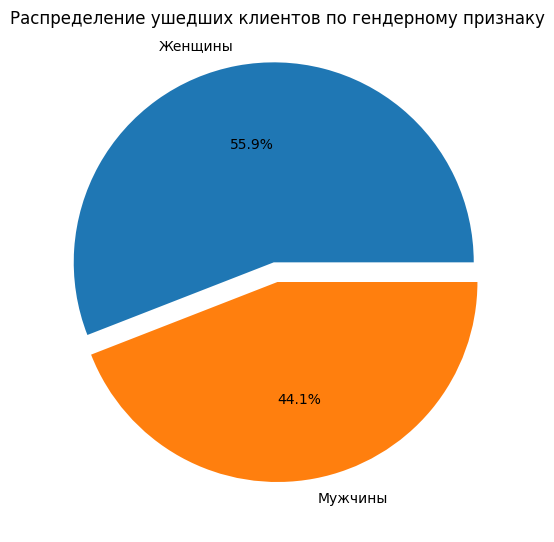

In [66]:
# импортирууем библиотеку Matplotlib
import matplotlib.pyplot as plt
plt.style.use('default')
# омпределяем дооли мужчин и женщин среди ушедших клиентов
churn_data_df_gender = churn_data_df[churn_data_df.Exited == 1].groupby('Gender')['Exited'].value_counts()
# строим диаграмму, иллюстрирующую доли ушедших мужчин и женщин
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data_df_gender,
    labels=('Женщины', 'Мужчины'),
    autopct='%.1f%%',
    explode = [0.1,0]
)
title = axes.set_title('Распределение ушедших клиентов по гендерному признаку')
fig.show()

In [58]:
import pandas as pd

In [59]:
import pandas as pd

###  Выводы: Женщин среди ушедших клиентов больше, чем мужчин

## 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [60]:
fig = px.histogram(churn_data_df, x = 'Loyalty',  color = 'NumOfProducts', title='Зависимость между лояльностью клиентов и приобретенными у банка услугами')
fig.show()

### Выводы: Лояльные клиенты приобрели у банка больше услуг, нежели ушедшие, причем у лояльных клиентов приобладают позиции 1 и 2 услуги, у ушедших клентов 3 услуги встречаются чаще, чем у лояльных.

## 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

Text(0.5, 1.0, 'Доля активных и не активных клиентов среди лояльных')

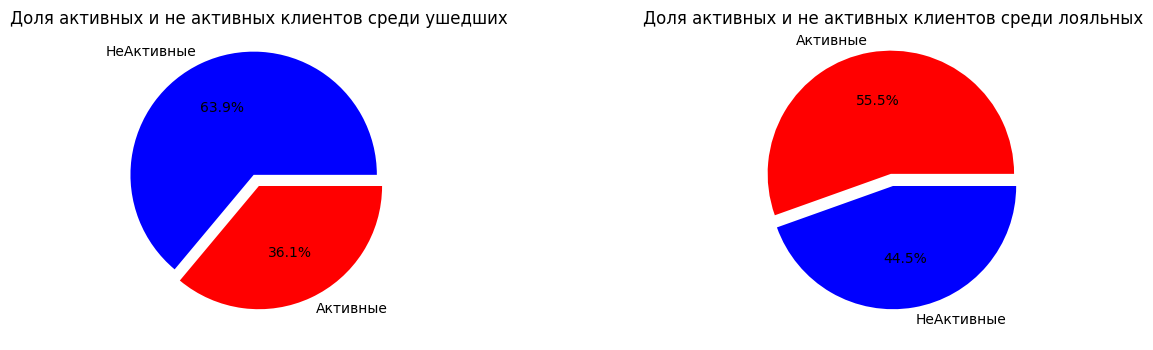

In [61]:
# импортирууем библиотеку Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# сортирую ушедших клиентов на активных и не активных
churn_data_df_act1 = churn_data_df[churn_data_df['Loyalty'] == 'Exited']['IsActiveMember'].value_counts()

#строю диаграмму для ушедших клиентов
axes[0].pie(
    churn_data_df_act1,
    labels=('НеАктивные', 'Активные'),
    colors=['blue', 'red'],
    autopct='%.1f%%',
    explode = [0.1, 0]
)
axes[0].set_title('Доля активных и не активных клиентов среди ушедших')

# сортирую лояльных клиентов на активных и не активных
churn_data_df_act2 = churn_data_df[churn_data_df['Loyalty'] == 'Loyal']['IsActiveMember'].value_counts()

#строю диаграмму для лояльных клиентов
axes[1].pie(
    churn_data_df_act2,
    labels=('Активные','НеАктивные'),
    colors=['red', 'blue'],
    autopct='%.1f%%',
    explode = [0.1, 0]
)

axes[1].set_title('Доля активных и не активных клиентов среди лояльных')

### Выводы: Процент ушедших клиентов, имеющих статус активных, = 36,1%', и он меньше, чем процент лояльных клиентов, имеющих статус активных, = 55,5%. Рекомендация банку: уделять активным клиентам больше внимания, делать им выгодные предложения, делать спец условия, предоставлять дополнитеьные льготы, выделить персонального менеджера и т.д.

## 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [62]:
# определяем долю ушедших клиентов по странам
churn_data_df_exited_ratio=churn_data_df[churn_data_df.Exited == 1].Geography.value_counts()/churn_data_df.Geography.value_counts()*100
# определяем данные в формат DataFrame
churn_data_df_exited_ratio_df = pd.DataFrame(data=churn_data_df_exited_ratio.items(), columns=['Country', 'Exited_ratio'])

#строим график
fig = px.choropleth(
data_frame= churn_data_df_exited_ratio_df, #DataFrame
locations="Country", #страна клиента
locationmode = "country names", #режим сопоставления локаций с базой Plotly
color="Exited_ratio", #от чего зависит цвет
range_color=[0, 35], #диапазон цвет 
title='Доля ушедших клиентов по странам', #заголовок
width=800, #ширина
height=500, #высота
color_continuous_scale='Reds' #палитра цветов
)
fig.show()

### Выводы: Доля ушедших клиентов в Германии что в два раза превышает долю таких клиентов Франции и почти в два раза в Испании. Это может быть связано со многими факторами - более активная позиция банка на рынках Франции и Испании, меньшая банковская конкуренция на рынках Франции и Испании, и большая - в Германии, более сильные позции банка на  рынках Франции и Испании, меннее силные - на в Германии. в Германии могут проявлять активность местные банки, предлагать боьше спец условий и акций для клиентов, а во Франции и Испании местне банки могут быть менее активными, Швейцарские банки ( Швейцария слвится своей банковской системой) могут быть более активными в Германии. и т.д.

## 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [63]:
# создаем функцию
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
 
 # Применяю функцию к столбцу CreditScore и создаю новый признак CreditScoreCat
churn_data_df['CreditScoreCat'] = churn_data_df['CreditScore'].apply(get_credit_score_cat)

## Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

In [64]:
# строю сводную таблицу
churn_data_df_pivot = churn_data_df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)
display(churn_data_df_pivot)


Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


## На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Text(0.5, 1.0, 'Тепловая карта категорий чаще всего уходящих клиентов')

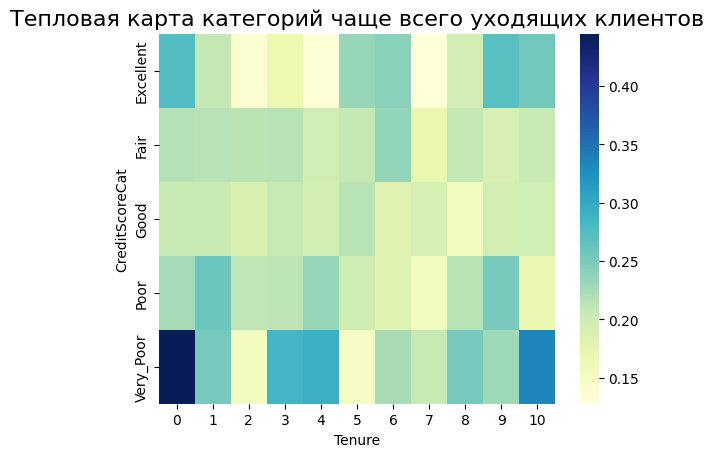

In [65]:
import seaborn as sns
heatmap = sns.heatmap(data=churn_data_df_pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта категорий чаще всего уходящих клиентов', fontsize=16)


### Выводы: Клиенты, которые уходят чаще всего, имеют рейтинг:
### -  Very_Poor  -  пользуются услугами банка менее года
### -  Very_Poor  -  пользуются услугами банка 10 лет
### далее категории Very_Poor ( 4 года), Excellent - до года и 9 лет